# Vehicle Fuel Economy Exploratory Data Analysis (EDA)


**Step 1: Import Necessary Libraries and Upload Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

url = "https://raw.githubusercontent.com/DrUzair/MLSD/master/Datasets/vehicles.csv"
df = pd.read_csv(url, low_memory=False)

**Step 2: Examine the Data**

In [2]:
print(df.head())

   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  T

**Step 3: Summarize the Data**

In [3]:
print(df.describe())

          barrels08    barrelsA08  charge120     charge240        city08  \
count  40081.000000  40081.000000    40081.0  40081.000000  40081.000000   
mean      17.363564      0.220069        0.0      0.036086     18.213318   
std        4.597119      1.143270        0.0      0.534894      7.397433   
min        0.060000      0.000000        0.0      0.000000      6.000000   
25%       14.330870      0.000000        0.0      0.000000     15.000000   
50%       16.480500      0.000000        0.0      0.000000     17.000000   
75%       19.388824      0.000000        0.0      0.000000     20.000000   
max       47.087143     18.311667        0.0     12.000000    150.000000   

            city08U       cityA08      cityA08U        cityCD         cityE  \
count  40081.000000  40081.000000  40081.000000  40081.000000  40081.000000   
mean       5.494777      0.616077      0.466164      0.000471      0.274113   
std       11.027993      4.739349      4.563736      0.039282      3.513989   

**Step 4: Handle Missing Values**
- In this step, I dropped the columns with null value

In [4]:
print(df.isnull().sum())
df_cleaned = df.dropna(axis=1)
print(df_cleaned.head())

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31704
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64
   barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  UHighwayA           VClass  year  \
0       0.0     0.0    0.0  ...        0.0      Two Seaters  1985   
1       0.0     0.0    0.0  ...        0.0      Two Seaters  1985   
2       0.0     0.0    0.0  ...        0.0  Subcompact Cars  1985   
3       0.0     0.0   

In this step, I am picking 20 variables to discover. Then separate them as categorical_column and numerical_column.

In [5]:
variables = ["barrels08", "city08", "co2TailpipeGpm", "comb08", "cylinders","displ","drive","engId","fuelCost08","fuelType1","highway08","make","model","mpgData","trany","UCity","VClass","UHighway","youSaveSpend","year"]
variables_data = df[variables]
categorical_variable = ["cylinders","displ","drive","engId","fuelType1","make","model","mpgData","trany","VClass","year"]
categorical_data = df[categorical_variable]
numerical_variable = ["barrels08", "city08", "co2TailpipeGpm", "comb08","fuelCost08","highway08","UCity","UHighway","youSaveSpend"]
numerical_data = df[numerical_variable]

Try getting the categorical_data

In [6]:
categorical_data_head = categorical_data.head()
print(categorical_data_head)

   cylinders  displ                       drive  engId         fuelType1  \
0        4.0    2.0            Rear-Wheel Drive   9011  Regular Gasoline   
1       12.0    4.9            Rear-Wheel Drive  22020  Regular Gasoline   
2        4.0    2.2           Front-Wheel Drive   2100  Regular Gasoline   
3        8.0    5.2            Rear-Wheel Drive   2850  Regular Gasoline   
4        4.0    2.2  4-Wheel or All-Wheel Drive  66031  Premium Gasoline   

         make                model mpgData            trany           VClass  \
0  Alfa Romeo   Spider Veloce 2000       Y     Manual 5-spd      Two Seaters   
1     Ferrari           Testarossa       N     Manual 5-spd      Two Seaters   
2       Dodge              Charger       Y     Manual 5-spd  Subcompact Cars   
3       Dodge  B150/B250 Wagon 2WD       N  Automatic 3-spd             Vans   
4      Subaru     Legacy AWD Turbo       N     Manual 5-spd     Compact Cars   

   year  
0  1985  
1  1985  
2  1985  
3  1985  
4  1993  


Explore Categorical Variables

In [7]:
print(categorical_data_head.value_counts())

cylinders  displ  drive                       engId  fuelType1         make        model                mpgData  trany            VClass           year
4.0        2.0    Rear-Wheel Drive            9011   Regular Gasoline  Alfa Romeo  Spider Veloce 2000   Y        Manual 5-spd     Two Seaters      1985    1
           2.2    4-Wheel or All-Wheel Drive  66031  Premium Gasoline  Subaru      Legacy AWD Turbo     N        Manual 5-spd     Compact Cars     1993    1
                  Front-Wheel Drive           2100   Regular Gasoline  Dodge       Charger              Y        Manual 5-spd     Subcompact Cars  1985    1
8.0        5.2    Rear-Wheel Drive            2850   Regular Gasoline  Dodge       B150/B250 Wagon 2WD  N        Automatic 3-spd  Vans             1985    1
12.0       4.9    Rear-Wheel Drive            22020  Regular Gasoline  Ferrari     Testarossa           N        Manual 5-spd     Two Seaters      1985    1
Name: count, dtype: int64


Explore Numerical Variables

In [8]:
numerical_data_head = numerical_data.head()
print(numerical_data_head.value_counts())

barrels08  city08  co2TailpipeGpm  comb08  fuelCost08  highway08  UCity    UHighway  youSaveSpend
12.207778  23      329.148148      27      1550        33         29.0000  47.0000    0              1
15.695714  19      423.190476      21      2000        25         23.3333  35.0000   -2250           1
17.347895  17      467.736842      19      2700        23         21.0000  32.0000   -5750           1
29.964545  9       807.909091      11      3850        14         11.0000  19.0000   -11500          1
           10      807.909091      11      3850        12         12.2222  16.6667   -11500          1
Name: count, dtype: int64


**Visualize the Data**

1. Histogram example:  This example shows that most vehicles consume about 17.5 barrels08 annually. There are outlier vehicles that consume more than 30 barrels08 annually.

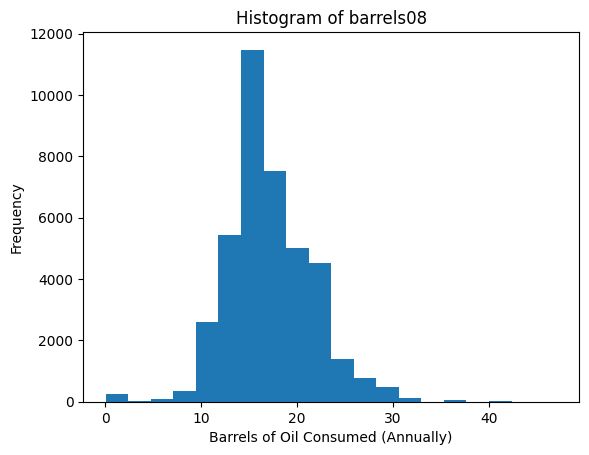

In [9]:
# .dropna() used to remove NaN
plt.hist(df_cleaned['barrels08'].dropna(), bins=20)
plt.xlabel('Barrels of Oil Consumed (Annually)')
plt.ylabel('Frequency')
plt.title('Histogram of barrels08')
plt.show()

2. Bar plot example:  This example shows that most vehicles are front-wheel drive and rear-wheel drive.

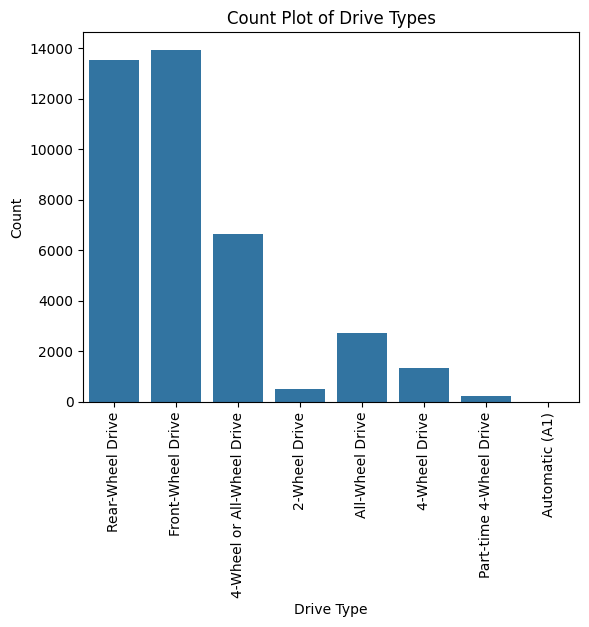

In [10]:
sns.countplot(data=categorical_data, x='drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.title('Count Plot of Drive Types')
plt.xticks(rotation=90)
plt.show()

Pairplot Example

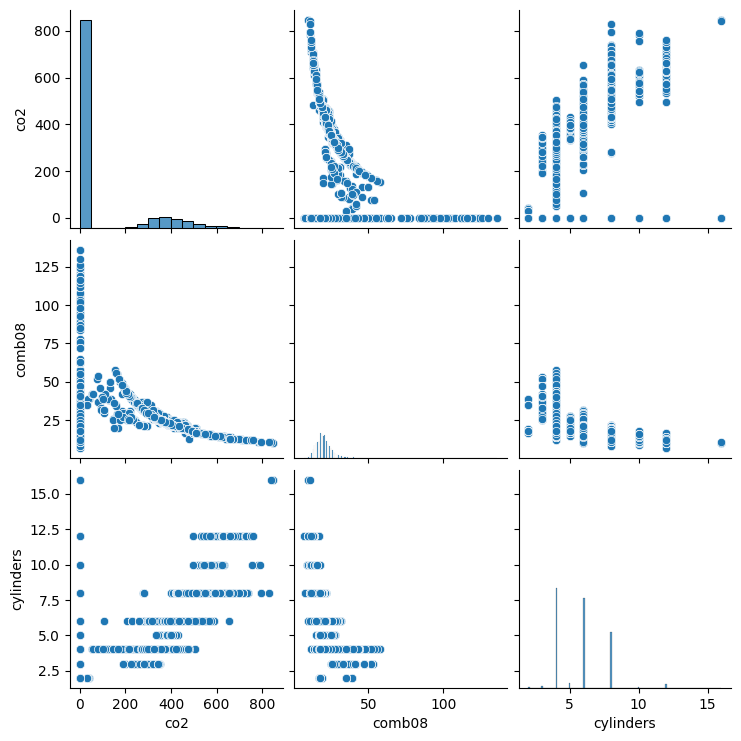

In [11]:
sns.pairplot(df[['co2', 'comb08', 'cylinders']])
plt.show()

**Dependent Variable - UCity**

The median UCity seems to be unchanged over the years

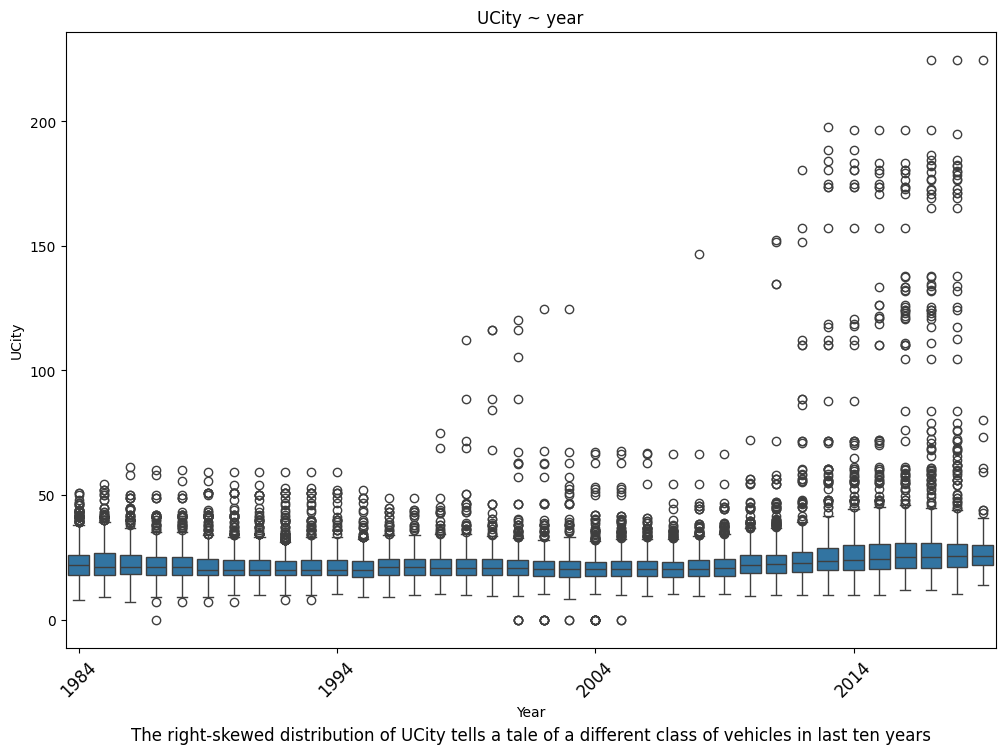

In [12]:
from matplotlib.ticker import MultipleLocator
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['UCity'] = pd.to_numeric(df['UCity'], errors='coerce')
df_clean = df.dropna(subset=['year', 'UCity'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='UCity', data=df_clean)
plt.title('UCity ~ year')
plt.xlabel('Year')
plt.ylabel('UCity')
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=45, fontsize=12, color='black')
plt.annotate('The right-skewed distribution of UCity tells a tale of a different class of vehicles in last ten years',
             xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=12, color='black')
plt.show()

Insights for the line plot below:

1. Most fuel types show a gradual increase in fuel costs from the 1980s to around 2008, followed by a slight decline or stabilization in recent years.
* One fun fact to note is that there was a 2000s energy crisis during the time of mid-1980s to September 2003, which could affect the cost.
2. Regular gasoline and premium gasoline have relatively consistent and similar trends over the years.
3. Natural gas has a few notable spikes, particularly around 2005. These spikes and the irregular trend could show the possibility of indicating fluctuating fuel costs or caused by inconsistent data entries.
4. Electricity has shown a decline in cost since around 2002, possibly due to electric vehicle effi

```
# This is formatted as code
```

ciency, the common use of electric vehicles, or changes in electricity pricing.
5. Diesel price shows the lowest price between around 1997 and 2008.


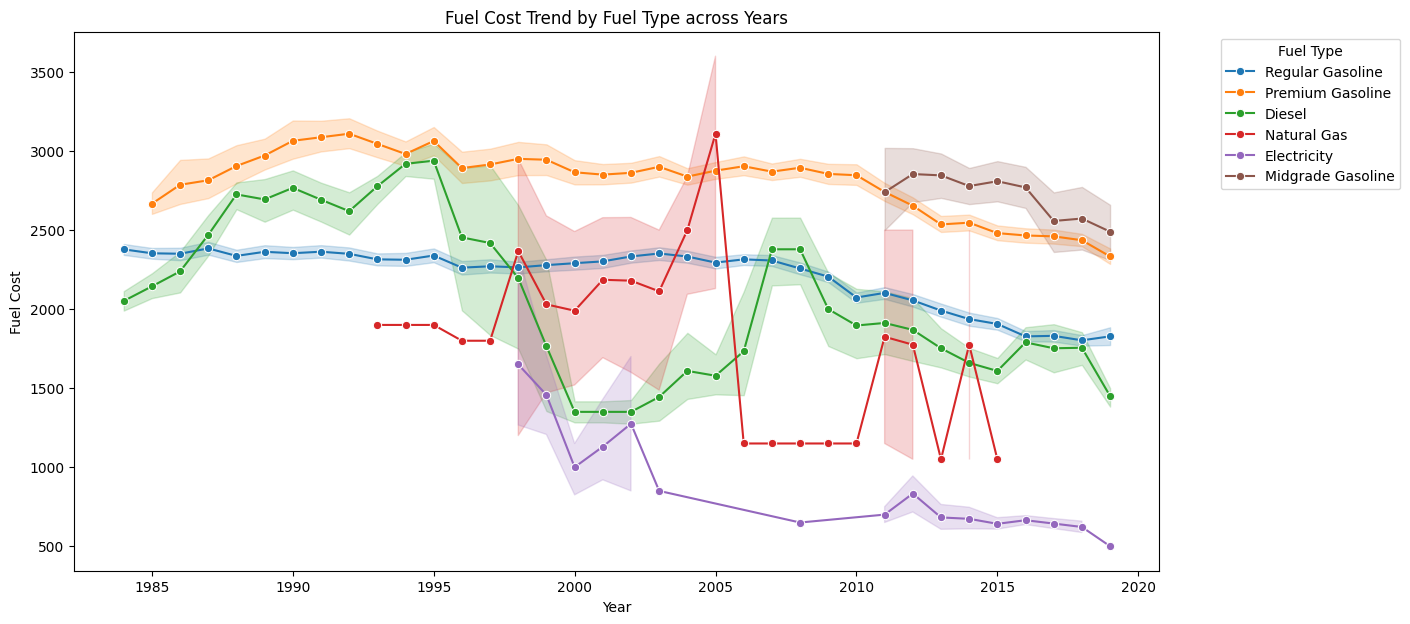

In [13]:
filtered_fuelType_fuelCost_year = df[['year', 'fuelType1', 'fuelCost08']].dropna()
# Create a line plot to show trends over years
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='fuelCost08', hue='fuelType1', data=filtered_fuelType_fuelCost_year, marker='o')
plt.title('Fuel Cost Trend by Fuel Type across Years')
plt.xlabel('Year')
plt.ylabel('Fuel Cost')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insights for the scatter plot below:
1. The distribution of city08 is right-skewed, with most vehicles having lower city MPG and a few vehicles achieving very high city MPG.
Highway MPG: The distribution of highway08 is also right-skewed, following a similar pattern to city MPG.
Combined MPG: The distribution of comb08 is similar to that of city and highway MPG, with most vehicles having lower combined MPG and a few having very high combined MPG.

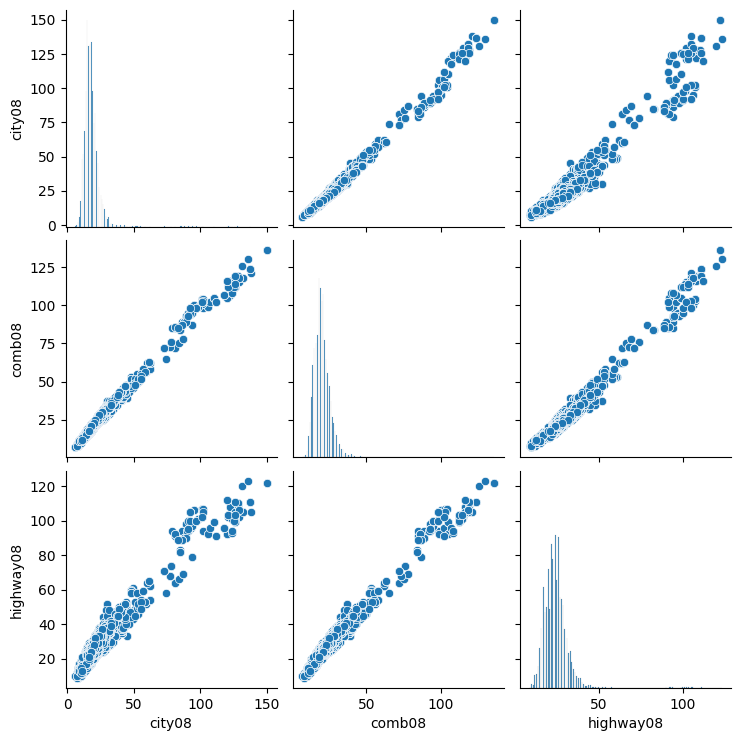

In [14]:
sns.pairplot(df[['city08', 'comb08', 'highway08']])
plt.show()

Insights for the scatter plot below:
1. This plot shows the trend where vehicles with higher city08 tend to have higher youSaveSpend values, which means more fuel-efficient vehicles (higher MPG) has greater savings.
2. There is a cluster of points with city08 between 20 and 40 MPG and youSaveSpend values around $0 to $5,000. However, the curve flattens as city MPG increases. This suggests that improving fuel efficiency from 10 to 20 MPG results in substantial savings, but improving from 60 to 70 MPG yields smaller incremental savings.
3. Vehicles with higher city MPG offer greater fuel savings, which shows the economic benefits of choosing fuel-efficient vehicles such as conventional and hybrid vehicles.

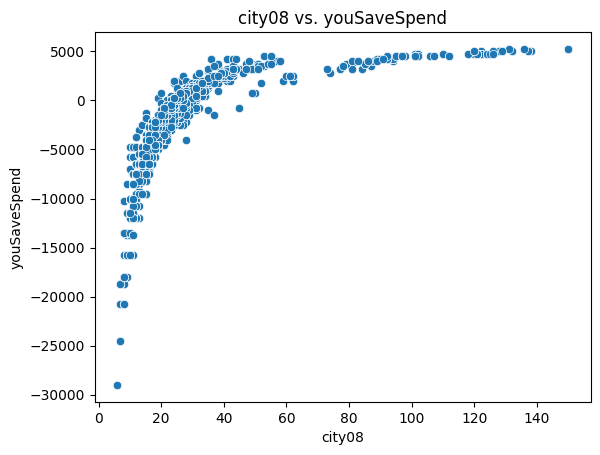

In [15]:
sns.scatterplot(x='city08', y='youSaveSpend', data=df)
plt.title('city08 vs. youSaveSpend')
plt.xlabel('city08')
plt.ylabel('youSaveSpend')
plt.show()

Insights for the scatter plot below:
1. This plot is to explore the relationship between UCity and city08; it is showing a positive correlation between UCity and city08, which means vehicles with higher UCity MPG also tend to have higher city08 MPG.
2. This trend shows driving in Ucity and city08 has similar fuel efficiency.
3. The similar trends observed between UHighway and highway08 show that, in general, there is minimal difference in fuel efficiency between urban and non-urban highway driving conditions.

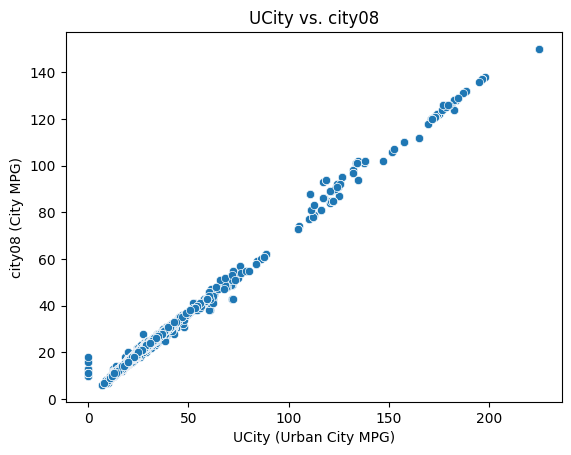

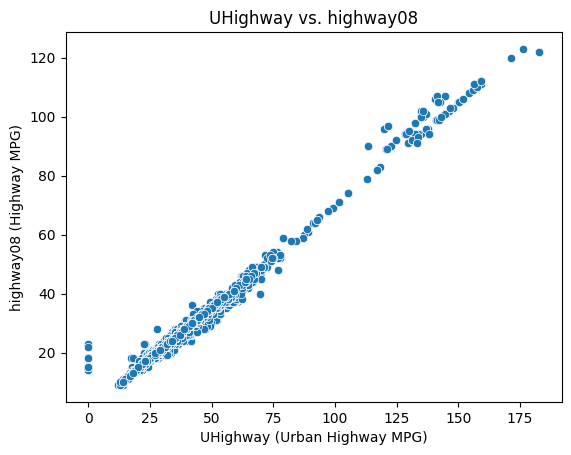

In [16]:
sns.scatterplot(x='UCity', y='city08', data=df)
plt.title('UCity vs. city08')
plt.xlabel('UCity (Urban City MPG)')
plt.ylabel('city08 (City MPG)')
plt.show()

sns.scatterplot(x='UHighway', y='highway08', data=df)
plt.title('UHighway vs. highway08')
plt.xlabel('UHighway (Urban Highway MPG)')
plt.ylabel('highway08 (Highway MPG)')
plt.show()

Insights from the correlation matrix below:
1. There is negative correlations between cylinders and [city08, comb08, highway08], which means that vehicles with more cylinders typically have lower fuel efficiency
2. There is a strong correlation between city08 and highway08, which means that vehicles that perform well in the city also tend to perform well on the highway.

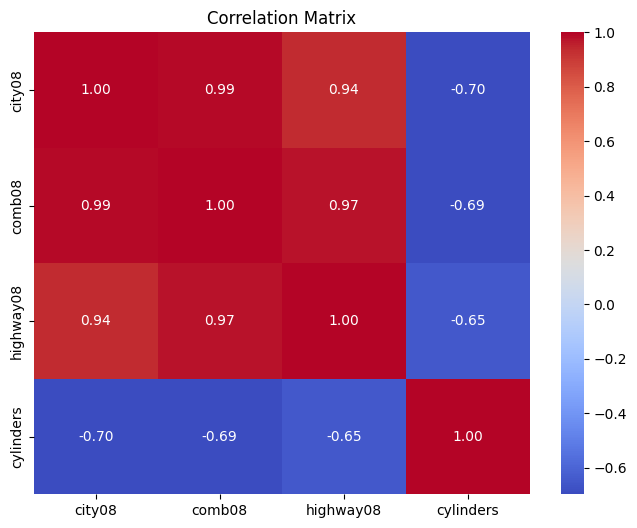

In [17]:
correlation_matrix = df[['city08', 'comb08', 'highway08', 'cylinders']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Insights from the box plot below:
1. This plot shows a negative correlation between the number of cylinders in a vehicle and its fuel efficiency in city driving conditions (city08).
2. 4 Cylinders is the most common category. The data shows a wide range of city MPG values, with a median of around 25-30 MPG. There are many outliers with higher MPG.
3. There are outliers in almost every category, which means that some vehicles perform significantly better or worse than the majority in their cylinder category possibly due to vehicle design or models.

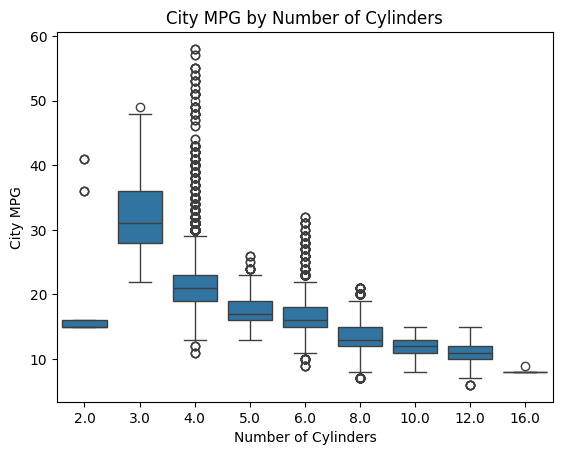

In [18]:
sns.boxplot(x='cylinders', y='city08', data=df)
plt.title('City MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('City MPG')
plt.show()

Insights from the box plot below:
1. Compact and subcompact cars have the lowest fuel costs which means these have higher fuel efficiency, while SUVs, trucks, and larger vehicles have higher fuel costs meaning lower in fuel efficiency.
2. Two Seaters, Sport Utility Vehicle 4WD, and Standard Pickup Trucks 4WD show a high median fuel cost.
3. Compact Cars, Subcompact Cars, and Minicompact Cars show low median fuel costs and less variability.

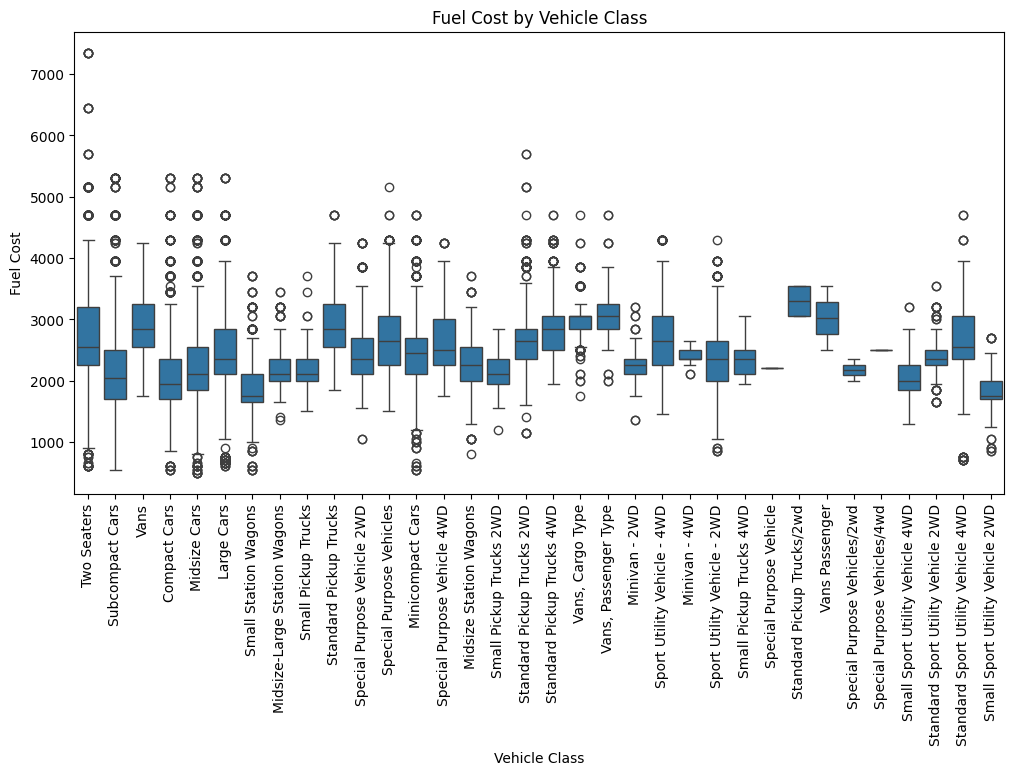

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='VClass', y='fuelCost08', data=df)
plt.title('Fuel Cost by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Cost')
plt.xticks(rotation=90)
plt.show()

Insights from the box plot below:
1. Starting around 2007, the combined MPG has been trending upward, which could mean there are improvements in vehicle fuel efficiency during this period with peaking at around 2018-2019. Another reason could be that companies are developing more efficient engines and introducing hybrid and electric vehicles during that time period.
2. With the increasing fuel costs and more environmental awareness, consumers may also change their preferences towards more fuel-efficient vehicles and causing the trends.

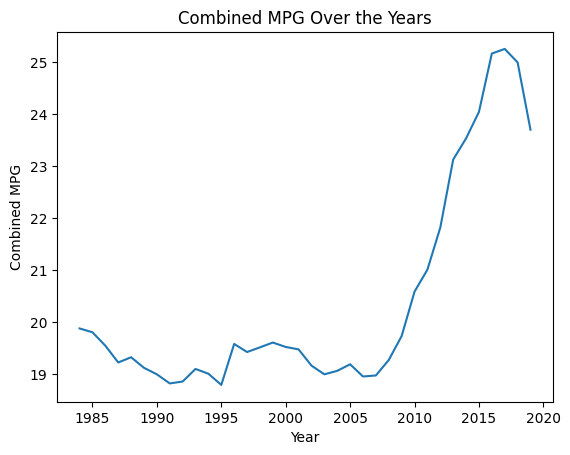

In [20]:
sns.lineplot(x='year', y='comb08', data=df, errorbar=None)
plt.title('Combined MPG Over the Years')
plt.xlabel('Year')
plt.ylabel('Combined MPG')
plt.show()

Insights from the box plot below:
1. Manual transmissions generally show a higher median city MPG compared to automatic transmission types.
2. Different transmission types do impact city fuel efficiency.
3. Auto A1 show high fuel-efficient, which that could be hybrid or electric vehicles.

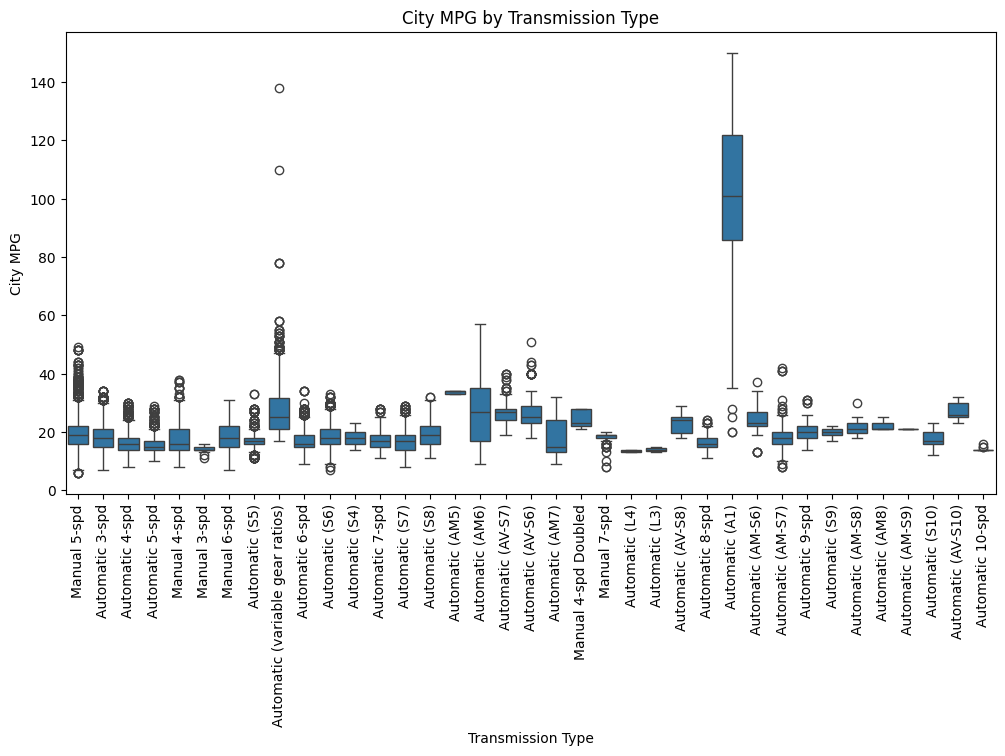

In [21]:
# Fuel Efficiency by Transmission Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='trany', y='city08', data=df)
plt.title('City MPG by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('City MPG')
plt.xticks(rotation=90)
plt.show()

Assignment 1 Q2: The UCity variable is treated as dependent/target variable in the specimen. Discuss your approach to build a predictive model. Is it going to be a classification model or regression model. Why? (1 point)

*   In this work, since UCity is a continuous variable and we want to work on the data for analysis and prediction, therefore this is a regression model. This is because the regression model is for predicting numerical outcomes, and classification models are for separating the data by category.


Assignment 1 Q3: Discuss which variables you will not consider as inputs to the model. Why? (2 points)

There are few kinds of variables that I will not consider as inputs to the model:
1. Exclude the columns that include duplicate data, for exmaple, fuelType and fuelType1, where fuelType1 already includes the information present in fuelType, making fuelType redundant. Including both would not add any new information and could lead to collinearity issues. Therefore, only fuelType1 will be used in the model to avoid duplication and redundancy.

2. Values that are not informative, for example, variables like engId and mpgData do not provide meaningful information for predicting fuel efficiency. engId is just an identifier, and mpgData is a binary indicator that does not contribute to the prediction. Additionally, columns like barrelsA08, charge120, and charge240 contain all zero values, meaning they do not vary across data points and offer no useful information for the model. Including such non-informative variables would add noise without improving the model's predictive power.

3. Features with numerous outliers can introduce noise and lead to a model that learns from these anomalies rather than the underlying patterns. Outliers can skew the model's predictions and result in poor generalization to new data. However, it's important to carefully evaluate the impact of outliers. In some cases, a model trained with outliers may perform better if the outliers represent significant variations that are relevant to the prediction task. Therefore, the decision to exclude features with outliers should be based on a thorough analysis of their impact on the model's performance.


Assignment 1 Q4: How will you evaluate your model to avoid over-fitting/under-fitting. (2 points)
To evaluate the model to avoid over-fitting/under-fitting, we can use train-test split and cross validation.

1. For the train-test split method, we can split the dataset into a training set and a test set. We can train the model with the training set and then evaluate it using the test set. This way we can ensure that the model performs well on unseen data and not just the data it was trained on.

2. For the k-fold cross-validation method, we can divide the dataset into k folds and train the model k times, each time using a different fold as the validation set and the remaining folds as the training set.

By using these methods, we can avoid over-fitting/under-fitting of our models.